## load logistic and lorenz logs

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [39]:
# fig = plt.figure(figsize=(20,3.5))
# ax = plt.gca()

def plot_ts(pred):
    y_true, y_pred =pred
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(y_true[:100,seq_id],'g')
    ax.set_ylim([-20,20])
    ax = fig.add_subplot(2, 4, i+1)
    ax.plot(y_pred[:100,seq_id], 'r')
    ax.set_ylim([-20,20])
    ax.set_title(model)

### load logs for lorenz and print test error

In [21]:
time_stamp ="09-18-17-11-56-02"
exp='lorenz'
models =["MRNN", "LSTM","TRNN"] #'phased_lstm']#
hz_list= [128]
lr_list =[2]
steps =  [20, 40, 60, 80, 100]


import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt



def read_config(fstream):
    d = {}
    for line in fstream:
        line.rstrip()
        tokens = line.split('\t')
        for token in tokens:
            try:
                key, val = token.split(":")
                d[key] = float(val)                
            except ValueError:
                'error prop'
    return d

def load_log(st, model):
    data_path = "/var/tmp/tensorRNN/log/"+exp+"/"+time_stamp+"/"+model+"/"+"st_"+str(st)+"/"
    print(data_path)
    f_pred= "predict.npy"
    f_err = "config.out"
    pred =  np.load(data_path+f_pred )
    with open(data_path+""+f_err,'r') as fstream:
        config = read_config(fstream)
    return config, pred

errs = np.ones((len(models), len(steps)))
i=0
for model in models:
    j=0
    for step in steps:
        print('load model {:s}, step'.format(model,step))
        config, pred = load_log(step, model)
        print('train error:',config['train_error'],'valid error:',config['valid_error'],'test err:',config['test_error'])
        errs[i,j] =  config['test_error']
        j +=1
    i +=1


load model MRNN, step
/var/tmp/tensorRNN/log/lorenz/09-18-17-11-56-02/MRNN/st_20/
train error: 0.0014894 valid error: 0.00199704 test err: 0.0395344
load model MRNN, step
/var/tmp/tensorRNN/log/lorenz/09-18-17-11-56-02/MRNN/st_40/
train error: 0.00196658 valid error: 0.00248175 test err: 0.0575352
load model MRNN, step
/var/tmp/tensorRNN/log/lorenz/09-18-17-11-56-02/MRNN/st_60/
train error: 0.00100921 valid error: 0.00188238 test err: 0.0579524
load model MRNN, step
/var/tmp/tensorRNN/log/lorenz/09-18-17-11-56-02/MRNN/st_80/
train error: 0.00287597 valid error: 0.00349535 test err: 0.0606476
load model MRNN, step
/var/tmp/tensorRNN/log/lorenz/09-18-17-11-56-02/MRNN/st_100/
train error: 0.00183309 valid error: 0.00265485 test err: 0.066126
load model LSTM, step
/var/tmp/tensorRNN/log/lorenz/09-18-17-11-56-02/LSTM/st_20/
train error: 0.000105404 valid error: 0.00306108 test err: 0.041038
load model LSTM, step
/var/tmp/tensorRNN/log/lorenz/09-18-17-11-56-02/LSTM/st_40/
train error: 0.0001

FileNotFoundError: [Errno 2] No such file or directory: '/var/tmp/tensorRNN/log/lorenz/09-18-17-11-56-02/TRNN/st_40/predict.npy'

[[ 0.0395344  0.0575352  0.0579524  0.0606476  0.066126 ]
 [ 0.041038   0.065417   0.0690443  0.0821315  0.0726326]
 [ 1.         1.         1.         1.         1.       ]
 [ 1.         1.         1.         1.         1.       ]]


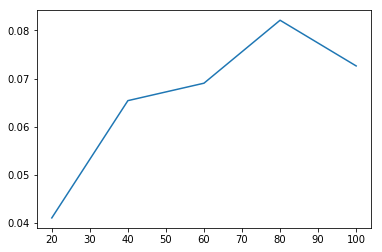

In [16]:
%matplotlib inline  
import matplotlib.pyplot as plt
print(errs)

plt.plot(steps,errs[0,:])
np.save('../result/lstm_lorenz.npy', errs[1,:])

In [3]:
np.set_printoptions(precision=3)
for k in range(len(models)):
    print(models[k])
    print(np.min(errs[:,:,k])) #row min--hidden size
    i,j = np.unravel_index(np.argmin(errs[:,:,k]),(4,4))
    print('hz', hz_list[i], 'lr', lr_list[j])

basic_rnn
0.290116404903
hz 256 lr 3
basic_lstm
0.312160490196
hz 32 lr 1
matrix_rnn
0.295931844584
hz 32 lr 1
tensor_rnn
0.275052446295
hz 256 lr 4
